# Example usage
## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from src.lstm_tsp import LSTMTimeSeriesPredictor
from src.flights_dataset import FlightsDataset

## Config

In [2]:
plot_config = {}
plot_config['training progress'] = False
plot_config['prediction on training data'] = False
plot_config['forecast'] = True

forecast_config = {}
forecast_config['include history'] = True
forecast_config['months ahead'] = 24

predictor_config = {}
predictor_config['epochs'] = 2000
predictor_config['learning rate'] = 1e-2
predictor_config['hidden dim'] = 100
predictor_config['layers num'] = 3

config = {}
config['plot'] = plot_config
config['forecast'] = forecast_config
config['predictor'] = predictor_config
config['predict enabled'] = False
config['forecast enabled'] = True

## Time Series Predictor instantiation

In [3]:
tsp = LSTMTimeSeriesPredictor(learning_rate=config['predictor']['learning rate'],
                              epochs=config['predictor']['epochs'],
                              hidden_dim=config['predictor']['hidden dim'],
                              num_layers=config['predictor']['layers num'])

## Training process

In [4]:

hist_loss = tsp.fit(FlightsDataset())
# training_dataframe = tsp.get_training_dataframe()

if config['plot']['training progress']:
    plt.figure()
    plt.plot(hist_loss, 'o-', label='train')
    plt.show()

██████| 1/1 [00:00<00:00, 24.39it/s, loss=1.43e-6]
[Epoch 2000/2000]: 100%|██████████| 1/1 [00:00<00:00, 24.39it/s, loss=8.35e-7]
model exported to model_2020_06_02__233408.pth with loss 0.000001



## Prediction on training data

In [5]:
if config['predict enabled']:
    # Select training example
    idx = np.random.randint(0, len(tsp.dataloader.dataset))
    x, y = tsp.dataloader.dataset[idx]

    # Run predictions
    netout = tsp.predict(x)

    if config['plot']['prediction on training data']:
        plt.figure()
    d_output = netout.shape[2]
    for idx_output_var in range(d_output):
        # Select real passengers data
        y_true = y[:, idx_output_var]

        y_pred = netout[0, :, idx_output_var]

        if config['plot']['prediction on training data']:
            plt.subplot(d_output, 1, idx_output_var+1)

            plt.plot(y_true, label="Truth")
            plt.plot(y_pred, label="Prediction")
            plt.title(tsp.dataloader.dataset.labels['y'][idx_output_var])
            plt.legend()
    if config['plot']['prediction on training data']:
        plt.show()

## Forecast of future

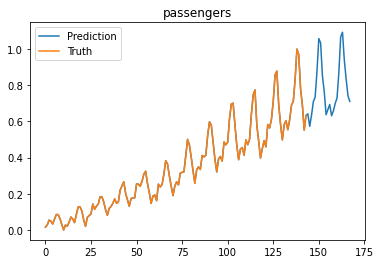

In [6]:

# Run forecast
if config['forecast enabled']:
    netout = tsp.forecast(config['forecast']['months ahead'],
                          include_history=config['forecast']['include history'])

    if config['plot']['forecast']:
        plt.figure()
    d_output = netout.shape[2]
    # Select any training example just for comparison
    idx = np.random.randint(0, len(tsp.dataloader.dataset))
    x, y = tsp.dataloader.dataset[idx]
    for idx_output_var in range(d_output):
        # Select real passengers data
        y_true = y[:, idx_output_var]

        y_pred = netout[0, :, idx_output_var]

        if config['plot']['forecast']:
            plt.subplot(d_output, 1, idx_output_var+1)

            if config['forecast']['include history']:
                plot_args = [y_pred]
            else:
                y_pred_index = [i+tsp.dataset.get_x_shape()[1]+1 for i in range(len(y_pred))]
                plot_args = [y_pred_index, y_pred]
            plt.plot(*plot_args, label="Prediction")
            plt.plot(y_true, label="Truth")
            plt.title(tsp.dataloader.dataset.labels['y'][idx_output_var])
            plt.legend()
    if config['plot']['forecast']:
        plt.show()
